<a href="https://colab.research.google.com/github/sightes/MGMODELOSAVANZADOS-METODOSNUMERICOS/blob/main/Tarea_Final_R_Analisis_multivariable_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

# Simulación de los datos binomiales
set.seed(123) # Opcional, para resultados reproducibles
datos_binomiales <- rbinom(n = 10000, size = 6, prob = 1/5)
# Calculando frecuencias
frecuencias <- table(datos_binomiales)
# Calculando frecuencias relativas
frecuencias_relativas <- frecuencias / length(datos_binomiales)
frecuencias_relativas

datos_binomiales
     0      1      2      3      4      5      6 
0.2604 0.3998 0.2464 0.0768 0.0149 0.0016 0.0001 

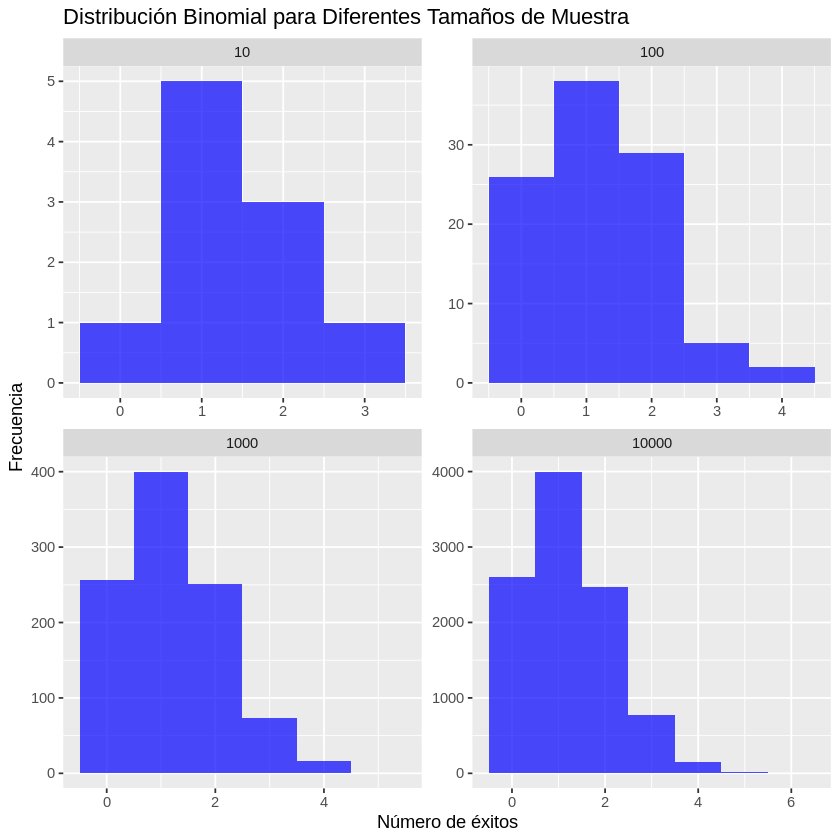

In [8]:
# Cargar librerías necesarias
library(ggplot2)
# Tamaños de muestra
muestras <- c(10, 100, 1000, 10000)
# Lista para almacenar los datos simulados
lista_datos <- list()
# Simulación de datos y cálculo de estadísticas descriptivas
for (n in muestras) {
  set.seed(123) # Para reproducibilidad
  datos <- rbinom(n, size = 6, prob = 1/5)
  lista_datos[[as.character(n)]] <- data.frame(
    Muestra = rep(n, length(datos)),
    Datos = datos
  )
}
# Combinar todos los datos en un solo data frame
datos_combinados <- do.call(rbind, lista_datos)
# Resumen descriptivo
resumen <- aggregate(Datos ~ Muestra, data = datos_combinados, function(x) {
  c(media = mean(x), desviacion = sd(x), mediana = median(x))
})

# Visualización con ggplot2
ggplot(datos_combinados, aes(x = Datos)) +
  geom_histogram(binwidth = 1, fill = "blue", alpha = 0.7) +
  facet_wrap(~ Muestra, scales = "free") +
  xlab("Número de éxitos") +
  ylab("Frecuencia") +
  ggtitle("Distribución Binomial para Diferentes Tamaños de Muestra")

In [9]:
# Tamaños de muestra
muestras <- c(10, 100, 1000, 10000)

# Lista para almacenar los datos simulados
lista_datos <- list()

# Simulación de datos
for (n in muestras) {
  set.seed(123) # Para reproducibilidad
  datos <- rbinom(n, size = 6, prob = 1/5)
  lista_datos[[as.character(n)]] <- datos
}

# Función para calcular las estadísticas deseadas
calcular_estadisticas <- function(datos) {
  c(
    Min = min(datos),
    P25 = quantile(datos, 0.25),
    Mediana = median(datos),
    Promedio = mean(datos),
    P75 = quantile(datos, 0.75),
    Max = max(datos)
  )
}

# Calculando y almacenando las estadísticas para cada muestra
estadisticas <- sapply(lista_datos, calcular_estadisticas)

# Visualizando las estadísticas
estadisticas

,10,100,1000,10000
Min,0.0,0.00,0.000,0.0000
P25.25%,1.0,0.00,0.000,0.0000
Mediana,1.0,1.00,1.000,1.0000
Promedio,1.4,1.19,1.197,1.1912
P75.75%,2.0,2.00,2.000,2.0000
Max,3.0,4.00,5.000,6.0000
